In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('/work/train-metadata.csv')
test_df = pd.read_csv('/work/test-metadata.csv')

print(len(train_df))

/tmp/ipykernel_4754/3840190490.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/work/train-metadata.csv')
401059


In [3]:
# from sklearn.ensemble import RandomForestClassifier
train_df

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [4]:
y = train_df['target']

In [5]:
# print(train_df.columns)
not_useful = ['isic_id', 'target', 'patient_id', 'image_type', 'attribution', 'copyright_license', 'lesion_id']

X_dropped = train_df.drop(not_useful, axis=1)

In [6]:
# which columns are categorical? Turn them into dummy columns

categorical = ['sex', 'anatom_site_general', 'tbp_tile_type', 'tbp_lv_location',
    'tbp_lv_location_simple', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index']

for col in X_dropped.columns:
    if col in categorical:
        X_dropped.loc[X_dropped[col].isnull(), col] = X_dropped[col].mode()
    else:
        X_dropped.loc[X_dropped[col].isnull(), col] = X_dropped[col].median()
X_dummies = pd.get_dummies(X_dropped, columns=categorical, drop_first=False)

In [7]:
for column in train_df.columns:
    if train_df[column].loc[train_df[column]=='1/mm^2'].count() > 0:
        print(column)


mel_mitotic_index


In [8]:
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_dummies, y, test_size=0.2, random_state=1)

In [9]:
print(len(X_dummies))
print(len(y_train))

401059
320847


In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

# print(clf.score(X_test, y_test))

RandomForestClassifier(max_depth=3, random_state=0)

In [11]:
print( y_train.sum() / len(y_train))

0.001025410865615075


In [12]:
# 99.897% of the data is False (0), so we need to define an accuracy function that has real meaning
def new_accuracy(y_true, y_pred):
    num_positives = sum(y_true)
    total_num = len(y_true)

    false_positives = sum((y_pred==1) & (y_true==0))
    false_negatives = sum((y_pred==0) & (y_true==1))
    true_positives = sum((y_pred==1) & (y_true==1))
    true_negatives = sum((y_pred==0) & (y_true==0))
    
    #return false_positives, false_negatives, true_positives, true_negatives
    #return false_negatives / num_positives, false_positives / (total_num - num_positives)
    return false_negatives / num_positives, false_positives / (total_num - num_positives)

print(new_accuracy(y_test, clf.predict(X_test)))
print(new_accuracy(y_train, clf.predict(X_train)))
# test_acc = new_accuracy(y_test, clf.predict(X_test))
# train_acc = new_accuracy(y_train, clf.predict(X_train))
# print(f"test false positive rate: {test_acc[1]:.5f}\ntest false negative rate: {test_acc[0]:.5f}")
# print(f"train false positive rate: {train_acc[1]:.5f}\ntrain false negative rate: {train_acc[0]:.5f}")

(0.0625, 0.0)
(0.06990881458966565, 0.0)


# DATA VISUALIZATION

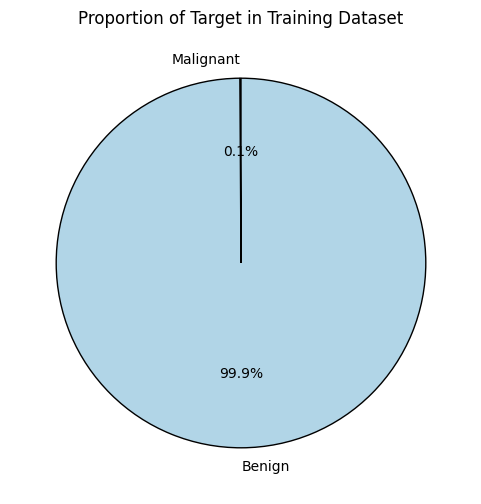

In [48]:
import matplotlib.pyplot as plt

total_rows = len(train_df)
num_of_positives = sum(train_df['target'])
colors=['red','#B1D5E7']
plt.figure(figsize=(6, 6))
plt.pie([num_of_positives, total_rows - num_of_positives], labels=['Malignant', 'Benign'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'},colors=colors)
plt.title('Proportion of Target in Training Dataset')
plt.show()

# to show that most of the training data is benign, which is why accuracy can be misleading

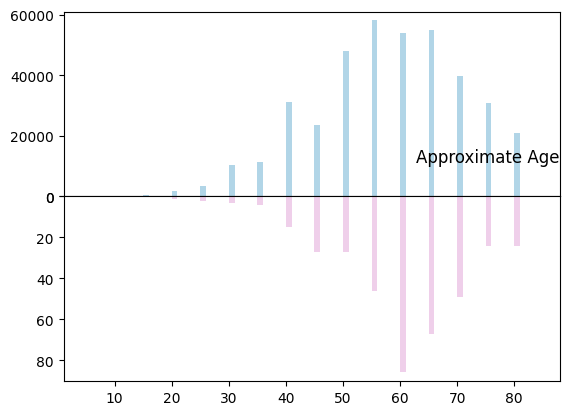

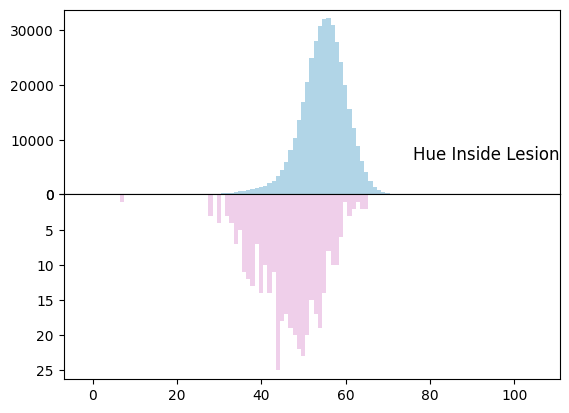

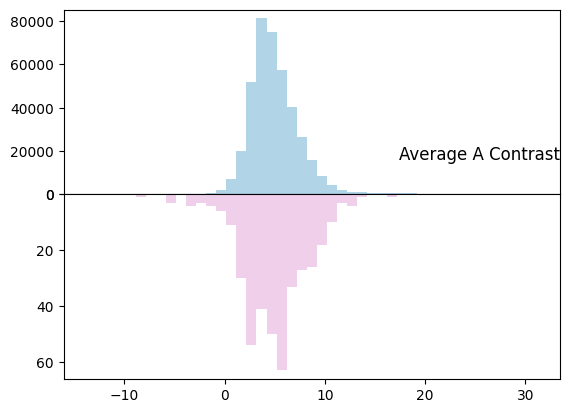

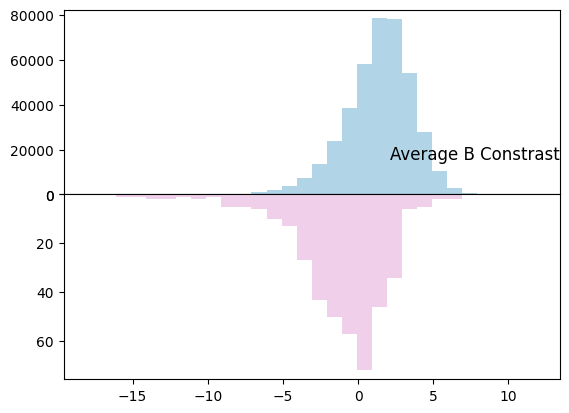

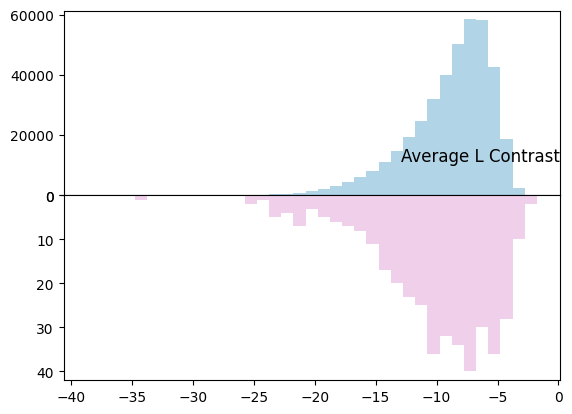

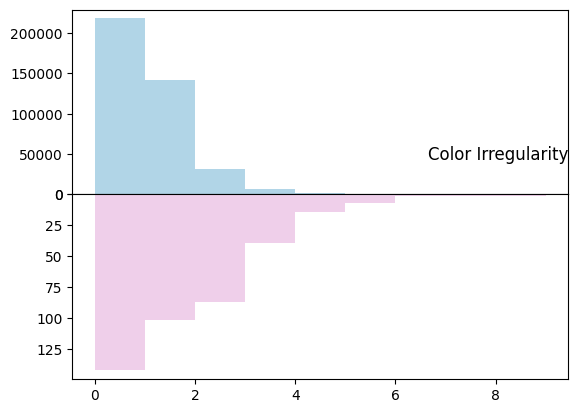

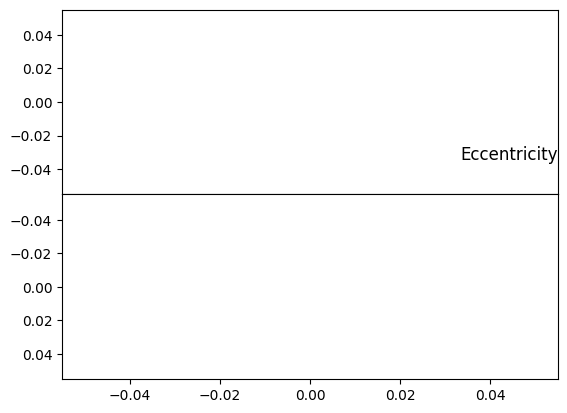

In [128]:
benign = train_df.loc[train_df['target'] == 0]
malignant = train_df.loc[train_df['target'] == 1]

#top is benign, bottom is malignant
comparison = ['age_approx', 'tbp_lv_H', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_color_std_mean', 'tbp_lv_eccentricity']
titles = ['Approximate Age', 'Hue Inside Lesion', 'Average A Contrast', 'Average B Constrast', 'Average L Contrast', 'Color Irregularity', 'Eccentricity']
for col, title in zip(comparison, titles):

    # ages = {'benign': benign[col][benign[col].notnull()].tolist(), 'malignant': malignant[col][malignant[col].notnull()].tolist()}
    # fig, ax = plt.subplots()
    # ax.boxplot(ages.values(), labels=ages.keys())
    # plt.title(title)
    # plt.show()
    # print(len(ages.values()))

    figs, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

    min_bin = min(train_df[col])
    max_bin = max(train_df[col])
    bins = np.arange(min_bin, max_bin)

    for ax, data, color, invert in zip(axes.ravel(), [benign[col].loc[benign[col].notnull()], malignant[col].loc[malignant[col].notnull()]], ['#B1D5E7','#EFCFEA'],  [False,True]):
        ax.hist(data, bins = bins, color = color)

        if invert:
            ax.invert_yaxis()

    plt.subplots_adjust(hspace=0)
    plt.title(title, loc = 'right', pad = 25)



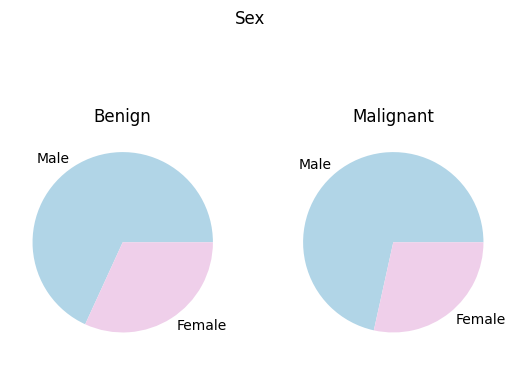

In [80]:
colors = ['#B1D5E7','#EFCFEA']
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie([benign['sex'].loc[benign['sex'] == 'male'].count(), benign['sex'].loc[benign['sex'] == 'female'].count()], labels=['Male', 'Female'], colors=colors)
ax2.pie([malignant['sex'].loc[malignant['sex'] == 'male'].count(), malignant['sex'].loc[malignant['sex'] == 'female'].count()], labels=['Male', 'Female'], colors=colors)
ax1.set_title('Benign')
ax2.set_title('Malignant')
plt.suptitle('Sex')
plt.show()

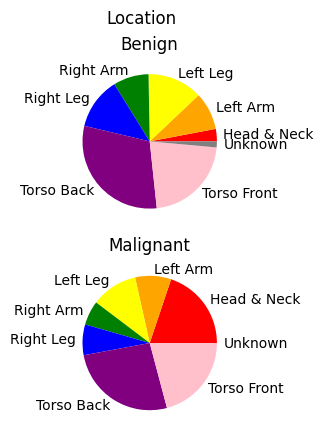

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1)
colors_plot = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'grey']
labels_location_simple = ['Head & Neck', 'Left Arm', 'Left Leg', 'Right Arm', 'Right Leg', 'Torso Back', 'Torso Front', 'Unknown']
ax1.pie([benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Head & Neck'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Left Arm'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Left Leg'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Right Arm'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Right Leg'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Torso Back'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Torso Front'].count(), benign['tbp_lv_location_simple'].loc[benign['tbp_lv_location_simple']=='Unknown'].count()], labels=labels_location_simple, colors = colors_plot)
ax2.pie([malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Head & Neck'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Left Arm'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Left Leg'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Right Arm'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Right Leg'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Torso Back'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Torso Front'].count(), malignant['tbp_lv_location_simple'].loc[malignant['tbp_lv_location_simple']=='Unknown'].count()], labels=labels_location_simple, colors = colors_plot)
ax1.set_title('Benign')
ax2.set_title('Malignant')
plt.suptitle('Location')
plt.show()



In [118]:
malignant['tbp_lv_eccentricity'].notnull()

387       True
935       True
1245      True
1846      True
3478      True
          ... 
396165    True
398671    True
399936    True
399943    True
400922    True
Name: tbp_lv_eccentricity, Length: 393, dtype: bool

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=805b9845-40b8-4cea-9708-87afb9c68c2d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>